## Importando Bibliotecas

In [159]:
#from google.colab import drive
#drive.mount('/content/drive')

In [160]:
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.simplefilter("ignore")

## Importando a Base de Dados

In [161]:
#database = 'muse_v3.csv'
#dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Estatística I/' + database)

In [162]:
database = 'muse_v3.csv'
dados = pd.read_csv(database)

## Entendendo a Base de Dados

In [163]:
dados.shape

(90001, 11)

In [164]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90001 entries, 0 to 90000
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   lastfm_url              90001 non-null  object 
 1   track                   90001 non-null  object 
 2   artist                  90001 non-null  object 
 3   seeds                   90001 non-null  object 
 4   number_of_emotion_tags  90001 non-null  int64  
 5   valence_tags            90001 non-null  float64
 6   arousal_tags            90001 non-null  float64
 7   dominance_tags          90001 non-null  float64
 8   mbid                    61217 non-null  object 
 9   spotify_id              61630 non-null  object 
 10  genre                   83362 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 7.6+ MB


In [165]:
dados.head()

,lastfm_url,track,artist,seeds,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,mbid,spotify_id,genre
0,https://www.last.fm/music/eminem/_/%2527till%2...,'Till I Collapse,Eminem,['aggressive'],6,4.550000,5.273125,5.690625,cab93def-26c5-4fb0-bedd-26ec4c1619e1,4xkOaSrkexMciUUogZKVTS,rap
1,https://www.last.fm/music/metallica/_/st.%2banger,St. Anger,Metallica,['aggressive'],8,3.710000,5.833000,5.427250,727a2529-7ee8-4860-aef6-7959884895cb,3fOc9x06lKJBhz435mInlH,metal
2,https://www.last.fm/music/rick%2bross/_/speedi...,Speedin',Rick Ross,['aggressive'],1,3.080000,5.870000,5.490000,NaN,3Y96xd4Ce0J47dcalLrEC8,rap
3,https://www.last.fm/music/m.i.a./_/bamboo%2bbanga,Bamboo Banga,M.I.A.,"['aggressive', 'fun', 'sexy', 'energetic']",13,6.555071,5.537214,5.691357,99dd2c8c-e7c1-413e-8ea4-4497a00ffa18,6tqFC1DIOphJkCwrjVzPmg,hip-hop
4,https://www.last.fm/music/dope/_/die%2bmf%2bdie,Die MF Die,Dope,['aggressive'],7,3.771176,5.348235,5.441765,b9eb3484-5e0e-4690-ab5a-ca91937032a5,5bU4KX47KqtDKKaLM4QCzh,metal


In [166]:
dados.tail()

,lastfm_url,track,artist,seeds,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,mbid,spotify_id,genre
89996,https://www.last.fm/music/gaby%2bhoffmann%2b%2...,Battle,Gaby Hoffmann & Jay Duplass,['transparent'],1,5.370000,3.450000,5.330000,NaN,NaN,NaN
89997,https://www.last.fm/music/omar%2brodriguez-lop...,Hands Tied to the Roots of a Hemorrhage,Omar Rodriguez-Lopez,['transparent'],4,5.797887,4.132254,5.570563,NaN,NaN,progressive rock
89998,https://www.last.fm/music/ace%2bwhite/_/crookf...,Crookfield Zoo,Ace White,['transparent'],1,5.370000,3.450000,5.330000,NaN,NaN,NaN
89999,https://www.last.fm/music/second%2bchyld/_/tra...,Transparent (Full Version),Second Chyld,['transparent'],1,5.370000,3.450000,5.330000,NaN,NaN,NaN
90000,https://www.last.fm/music/message%2bto%2bbears...,Unfold,Message To Bears,['translucent'],2,3.340000,1.405000,3.500000,247179b0-af1f-4c2b-b4fe-751070d1c0cc,14BYEOeRb3jzglJmKX8eM2,ambient


In [95]:
dados.describe()

,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags
count,90001.000000,90001.000000,90001.000000,90001.000000
mean,3.987745,5.454280,4.317691,5.246029
std,4.153822,1.553079,1.154948,1.171096
min,1.000000,0.235000,0.108113,0.229231
25%,1.000000,4.277500,3.527500,4.550194
50%,2.000000,5.650000,4.330000,5.460000
75%,5.000000,6.696667,5.150000,6.115443
max,50.000000,8.475000,7.270000,7.440000


## Verificando Duplicados

Na página onde se encontra a Base de Dados, há um aviso de que se tem uma quantidade significativa de duplicadas. Então, vamos analisar como podemos fazer a limpeza.

[Página para a Base de Dados no Kaggle](https://www.kaggle.com/datasets/cakiki/muse-the-musical-sentiment-dataset)

Observe, na Base de Dados, que não faz sentido procurar as músicas duplicadas através das colunas: "seeds", "number_of_emotion_tags", "valence_tags", "arousal_tags", "dominance_tags", "genre". Vamos, portanto, analizar as demais colunas.

In [96]:
# verificando duplicados pela coluna "lastfm_url"
dados.duplicated("lastfm_url").sum()

0

In [97]:
# verificando duplicados pela coluna "mbid"
duplicate_mbid = dados[dados.duplicated("mbid")]
numero_linhas_duplicadas_mbid = duplicate_mbid.shape[0]
print("Número de linhas duplicadas:", numero_linhas_duplicadas_mbid)
numero_na_mbid = dados["mbid"].isna().sum()
print("Número de NaN:", numero_na_mbid)


Número de linhas duplicadas: 28783
Número de NaN: 28784


In [98]:
duplicate_mbid[["track", "mbid"]]

,track,mbid
6,Feedback,NaN
58,Wollt Ihr Das Bett In Flammen,NaN
72,"Hey, Cruel World...",NaN
86,Self vs Self,NaN
88,Roadblox,NaN
...,...,...
89995,RAINY,NaN
89996,Battle,NaN
89997,Hands Tied to the Roots of a Hemorrhage,NaN
89998,Crookfield Zoo,NaN


In [99]:
# verificando duplicados pela coluna "track"
duplicate_track = dados[dados.duplicated("track")]
numero_linhas_duplicadas_track = duplicate_track.shape[0]
print("Número de linhas duplicadas:", numero_linhas_duplicadas_track)
numero_na_track = dados["track"].isna().sum()
print("Número de NaN:", numero_na_track)

Número de linhas duplicadas: 10609
Número de NaN: 0


In [100]:
duplicate_track[["track", "artist"]]

,track,artist
79,Requiem,Avenged Sevenfold
306,Damage,Non-Prophets
623,Down,Pitchshifter
783,Ruiner,The Body
786,Blaze,Arsonists
...,...,...
89983,Secret,Quietdrive
89989,Transparent,Porcelain Black
89992,Transparent,Second Chyld
89996,Battle,Gaby Hoffmann & Jay Duplass


In [101]:
# verificando Duplicados pela coluna "track" e "artist"
duplicate_track_artist = dados[dados.duplicated(["track", "artist"])]
numero_linhas_duplicadas_track_artist = duplicate_track_artist.shape[0]
print(numero_linhas_duplicadas_track_artist)
numero_na_track = dados["track"].isna().sum()
print(numero_na_track)

0
0


In [102]:
# verificando Duplicados pela coluna "spotify_id"
duplicate_spotify_id = dados[dados.duplicated("spotify_id")]
numero_linhas_duplicadas_spotify_id = duplicate_spotify_id.shape[0]
print("Número de linhas duplicadas:", numero_linhas_duplicadas_spotify_id)
numero_na_spotify_id = dados["spotify_id"].isna().sum()
print("Número de NaN:", numero_na_spotify_id)

Número de linhas duplicadas: 29344
Número de NaN: 28371


In [103]:
duplicate_spotify_id[["track","spotify_id"]]

,track,spotify_id
29,I'm the One,NaN
31,I'm Crying,NaN
55,Thru the Walls,NaN
56,It's So Easy,NaN
125,Don't Pray on Me,NaN
...,...,...
89995,RAINY,NaN
89996,Battle,NaN
89997,Hands Tied to the Roots of a Hemorrhage,NaN
89998,Crookfield Zoo,NaN


In [104]:
# verificando as linhas que não são NaN e estão duplicadas

duplicate_spotify_id[duplicate_spotify_id["spotify_id"].notna()][["track", "spotify_id"]]

,track,spotify_id
376,"Come To Daddy, Pappy Mix",53T0V3jTJDs3kIqwvlgspI
409,Come to Daddy [Pappy Mix],53T0V3jTJDs3kIqwvlgspI
493,Blur The Technicolor [Poker From Stud To Strip...,0Kv3NV97Pu1tdPfsifVlWm
531,Rock N Roll Nigger,5VYVcGgRxhz39ujXLRB42p
899,More Human Than Human [Meet Bambi In The King'...,2G3F5LyALgIMFbcCi88oYO
...,...,...
89664,Marduk T-Shirt Men's Room Incident,3fncHAdVqkMaQ2yfOUUCuA
89688,Bigfoot,67yMXB3cMuDWpgSmVlKjCP
89802,MTV - Get off the Air,5wQ6zZPJnqI9DAXv4qcRjL
89823,"John, 2,14",4jbhOZFJtvO2gyHxwfhWks


In [105]:
# exemplo de duplicada

dados[dados["spotify_id"] == "2ubBqnxBNP8QpoGQ77NPuO"][["track", "spotify_id"]]

,track,spotify_id
43556,Rainbows,2ubBqnxBNP8QpoGQ77NPuO
89930,Rainbows (Live '01),2ubBqnxBNP8QpoGQ77NPuO


### Conclusão:

Coluna "last_fm": não vamos conseguir fazer essa filtragem com essa coluna uma vez que não apresenta duplicadas.

Coluna "mbid": os números de duplicadas e NaN se diferem em uma unidade, o que faz crer que as duplicadas se dão pelos NaN. Assim não podemos usar essa coluna somente para fazer essa filtragem.

Coluna "track": tem potencial a ser usada para fazer a filtragem. Mas existem músicas de mesmo nome mas de artistas diferente, ou seja, temos que essas músicas são duplicadas, mas na realidade não são.

Coluna "track" e coluna "artist": Observe que temos 0 duplicadas e sabemos que isso é falso, provavelmente as strings que representam os nomes das musicas e/ou dos artistas se diferem. Para usar as coluna "track" e "artist" para a filtragem seria necessário algum tipo de tratamento nos valores das colunas.

Coluna "spotify_id": as linhas duplicadas se dão em grande maioria pelos valores das colunas serem NaN, o que não implica estarmos tratando da mesma música. Mas como o número de NaN é diferente do número de linhas duplicadas, podemos entender que as linhas linhas que não possuem NaN como valor mas estão duplicadas são músicas que realmente se repetem na base.

## Limpeza

Limpando duplicadas e substituindo NaN por "unknown" na coluna "genre".

In [106]:
# linhas onde temos valores que não são NaN e são duplicadas
linhas_duplicadas = dados["spotify_id"].notna() & dados.duplicated(subset=["spotify_id"])

# fazendo limpeza
dados = dados[~linhas_duplicadas]

In [107]:
# conferindo limpeza, se a limpeza estiver correta devemos ter o número de linhas duplicadas e o número de NaN diferindo em uma unidade.

duplicate_spotify_id = dados[dados.duplicated("spotify_id")]
numero_linhas_duplicadas_spotify_id = duplicate_spotify_id.shape[0]
print("Número de linhas duplicadas:", numero_linhas_duplicadas_spotify_id)
numero_na_spotify_id = dados["spotify_id"].isna().sum()
print("Número de NaN:", numero_na_spotify_id)


Número de linhas duplicadas: 28370
Número de NaN: 28371


In [108]:
# substituindo NaN por "unknown" na coluna "genre"
dados["genre"] = dados["genre"].fillna("unknown")

In [109]:
# arrumando os indices depois do drop

dados.reset_index(drop=True, inplace=True)

## Alterações na Base de Dados

Adicionando Colunas -> Iremos trocar a coluna "seeds" que é a coluna onde os valores são os sentimentos por colunas onde cada coluna é um sentimento, iremos atribuir 1 caso apareça o sentimento na linha correspondente e 0 caso contrário.

In [110]:
# ajustando o formato das strings na coluna "seeds"
dados["seeds"] = dados["seeds"].str.strip("[]").str.replace("'", "").str.split(', ')

# conjunto para armazenar todos os sentimentos
sentimentos = set()

# lista para guardar os sentimentos repetidos
sentimentos_que_repetiram = []

# Percorrer as listas
for lista in dados["seeds"]:
    for sentimento in lista:
        if sentimento in sentimentos:
            sentimentos_que_repetiram.append(sentimento)
        else:
            sentimentos.add(sentimento)

# criando as colunas
for sentimento in sentimentos:
    dados[sentimento] = 0

# preenchendo as colunas
for sentimento in sentimentos:
    dados[sentimento] = dados["seeds"].apply(lambda lista: 1 if sentimento in lista else 0)


## Excluindo colunas que não usaremos

Agora, já tratamos a base, e considerando o objetivo da análise a ser feita, não precisaremos de algumas colunas, sendo elas: "lastfm_url", "seeds", "mbid", "spotify_id".

In [111]:
dados.drop(columns = ["lastfm_url", "seeds", "mbid", "spotify_id"], inplace = True)

In [112]:
dados.head()

,track,artist,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,genre,child-like,silly,introspective,...,suspenseful,exotic,athletic,gritty,mighty,strong,ironic,elegant,enigmatic,flowing
0,'Till I Collapse,Eminem,6,4.550000,5.273125,5.690625,rap,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,St. Anger,Metallica,8,3.710000,5.833000,5.427250,metal,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Speedin',Rick Ross,1,3.080000,5.870000,5.490000,rap,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bamboo Banga,M.I.A.,13,6.555071,5.537214,5.691357,hip-hop,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Die MF Die,Dope,7,3.771176,5.348235,5.441765,metal,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Análise - Gênero e Sentimento

Vamos ver quais são os gêneros e sentimentos que mais aparecem na base de dados em geral.

Também elencamos determinados sentimentos para observar quais gêneros mais aparecem por sentimento.

Além disso, vamos ver quais são os sentimentos que mais aparecem por gênero musical (Indie, Rock, Electronic, Pop, Ambient).

In [113]:
# vamos ver quantos sentimentos existem

freq_sentimentos = dados[dados.columns[7:]].sum()
freq_sentimentos.shape

(276,)

In [114]:
# vamos ver quais são os sentimentos que mais aparecem em geral

freq_sentimentos = freq_sentimentos.sort_values(ascending= False)
freq_sentimentos.head(20)

gloomy        999
harsh         998
eerie         997
lonely        997
nocturnal     997
intense       997
gentle        996
exotic        996
stylish       995
relaxed       995
gritty        995
mystical      995
spooky        994
lyrical       993
cheerful      993
aggressive    993
angry         992
lush          992
whimsical     992
organic       991
dtype: int64

In [115]:
# criando df para análise elencando os sentimentos

df_aggressive = dados[["aggressive", "genre", "valence_tags", "arousal_tags", "dominance_tags"]]
df_angry = dados[["angry", "genre", "valence_tags", "arousal_tags", "dominance_tags"]]
df_harsh = dados[["harsh", "genre", "valence_tags", "arousal_tags", "dominance_tags"]]
df_spooky = dados[["spooky", "genre", "valence_tags", "arousal_tags", "dominance_tags"]]
df_cheerful = dados[["cheerful", "genre", "valence_tags", "arousal_tags", "dominance_tags"]]

In [116]:
# somando quantidade de ocorrências de cada sentimento por gênero e pegando o top 20

freq_aggressive = df_aggressive.groupby(["genre"])["aggressive"].sum().sort_values(ascending=False).head(20)
freq_angry = df_angry.groupby(["genre"])["angry"].sum().sort_values(ascending=False).head(20)
freq_harsh = df_harsh.groupby(["genre"])["harsh"].sum().sort_values(ascending=False).head(20)
freq_spooky = df_spooky.groupby(["genre"])["spooky"].sum().sort_values(ascending=False).head(20)
freq_cheerful = df_cheerful.groupby(["genre"])["cheerful"].sum().sort_values(ascending=False).head(20)

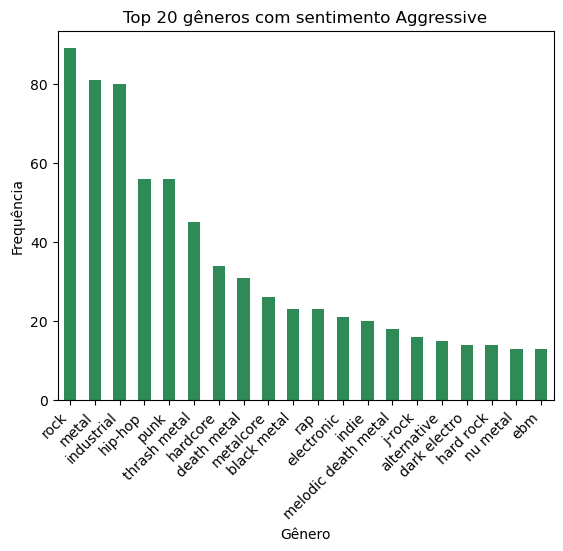

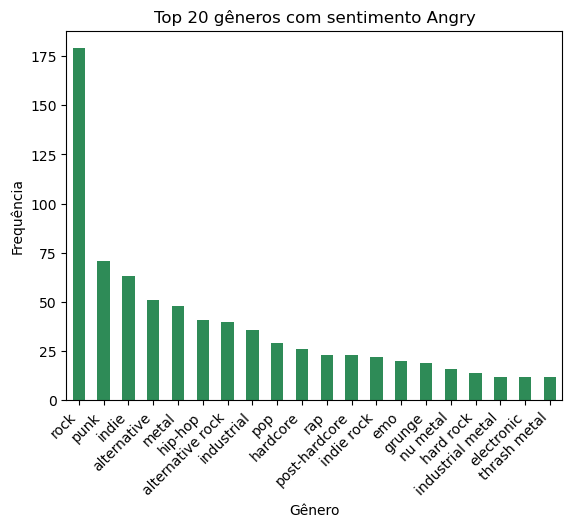

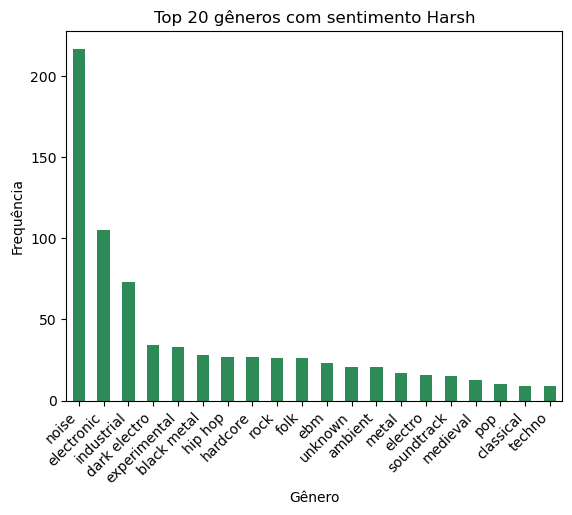

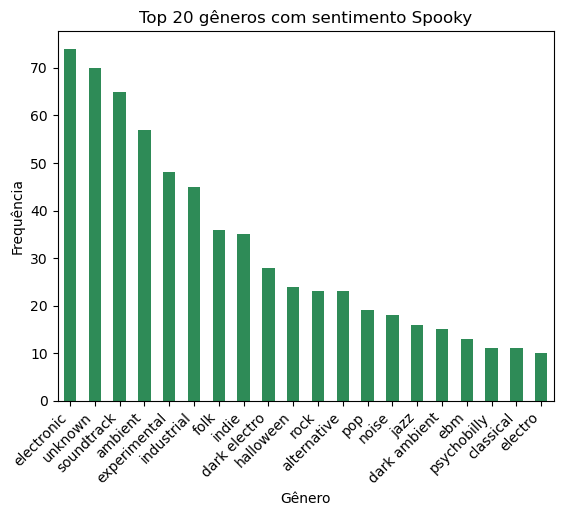

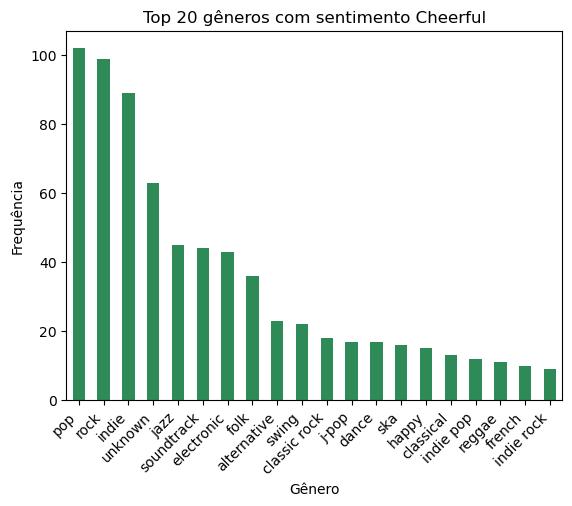

In [117]:
# análise dos sentimentos

freq_aggressive.plot.bar(color = "#2E8B57")
plt.xlabel("Gênero")
plt.ylabel("Frequência")
plt.title("Top 20 gêneros com sentimento Aggressive")
plt.xticks(rotation = 45, ha = 'right')
plt.show()

freq_angry.plot.bar(color = "#2E8B57")
plt.xlabel("Gênero")
plt.ylabel("Frequência")
plt.title("Top 20 gêneros com sentimento Angry")
plt.xticks(rotation = 45, ha = 'right')
plt.show()

freq_harsh.plot.bar(color = "#2E8B57")
plt.xlabel("Gênero")
plt.ylabel("Frequência")
plt.title("Top 20 gêneros com sentimento Harsh")
plt.xticks(rotation = 45, ha = 'right')
plt.show()

freq_spooky.plot.bar(color = "#2E8B57")
plt.xlabel("Gênero")
plt.ylabel("Frequência")
plt.title("Top 20 gêneros com sentimento Spooky")
plt.xticks(rotation = 45, ha = 'right')
plt.show()

freq_cheerful.plot.bar(color = "#2E8B57")
plt.xlabel("Gênero")
plt.ylabel("Frequência")
plt.title("Top 20 gêneros com sentimento Cheerful")
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [118]:
# vamos ver a quantidade de gêneros que existem

dados["genre"].unique().shape

(812,)

In [119]:
# vamos ver os gêneros que mais aparecem

freq_generos = dados["genre"].value_counts()
freq_generos.head(20)

indie                6919
unknown              6608
rock                 6095
electronic           5376
pop                  4794
ambient              2613
folk                 2573
soundtrack           2425
alternative          2164
hip-hop              2025
soul                 1680
jazz                 1598
experimental         1303
classic rock         1204
singer-songwriter    1190
acoustic             1080
noise                1026
piano                 994
industrial            932
indie rock            931
Name: genre, dtype: int64

In [120]:
# vamos ver os sentimentos que mais aparecem por gênero

df_genre_sentimento = dados[dados.columns[6:]].copy()
df_genre_sentimento.groupby(by = ["genre"]).sum()

,child-like,silly,introspective,dreamy,rebellious,wintry,bitter,happy,elegiac,rollicking,...,suspenseful,exotic,athletic,gritty,mighty,strong,ironic,elegant,enigmatic,flowing
genre,,,,,,,,,,,,,,,,,,,,,
8-bit,0,1,0,0,0,0,0,0,0,1,...,0,8,0,0,0,0,0,0,0,0
a cappella,0,3,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
abstract,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
accordeon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
accordion,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yacht rock,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yoga,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
yoik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
# somando quantidade de ocorrências dos sentimentos para cada gênero e pegando o top 20

df_indie_sentimento = df_genre_sentimento[df_genre_sentimento["genre"] == "indie"]
freq_indie = df_indie_sentimento[df_indie_sentimento.columns[1:]].sum()
freq_indie.sort_values(ascending= False, inplace = True)
indie_top_sentimentos = freq_indie.head(20)

df_rock_sentimento = df_genre_sentimento[df_genre_sentimento["genre"] == "rock"]
freq_rock = df_rock_sentimento[df_rock_sentimento.columns[1:]].sum()
freq_rock.sort_values(ascending= False, inplace = True)
rock_top_sentimentos = freq_rock.head(20)

df_electronic_sentimento = df_genre_sentimento[df_genre_sentimento["genre"] == "electronic"]
freq_electronic = df_electronic_sentimento[df_electronic_sentimento.columns[1:]].sum()
freq_electronic.sort_values(ascending= False, inplace = True)
electronic_top_sentimentos = freq_electronic.head(20)

df_pop_sentimento = df_genre_sentimento[df_genre_sentimento["genre"] == "pop"]
freq_pop = df_pop_sentimento[df_pop_sentimento.columns[1:]].sum()
freq_pop.sort_values(ascending= False, inplace = True)
pop_top_sentimentos = freq_pop.head(20)

df_ambient_sentimento = df_genre_sentimento[df_genre_sentimento["genre"] == "ambient"]
freq_ambient = df_ambient_sentimento[df_ambient_sentimento.columns[1:]].sum()
freq_ambient.sort_values(ascending= False, inplace = True)
ambient_top_sentimentos = freq_ambient.head(20)

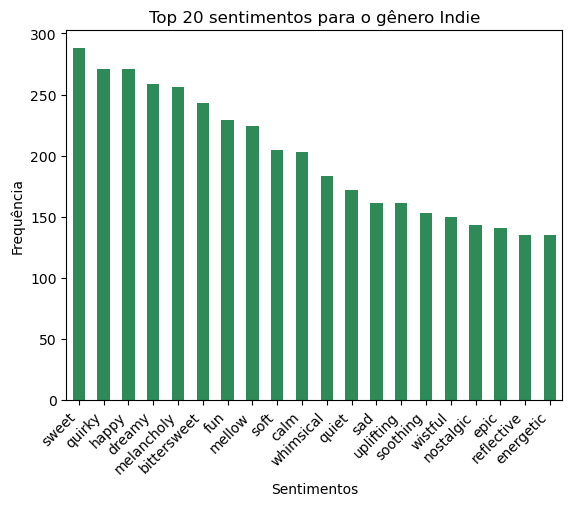

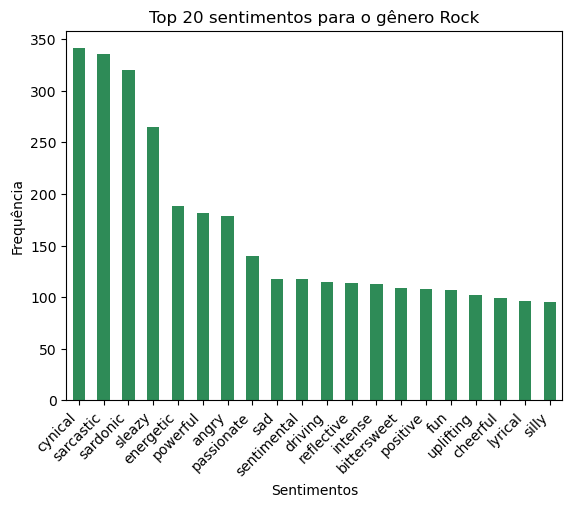

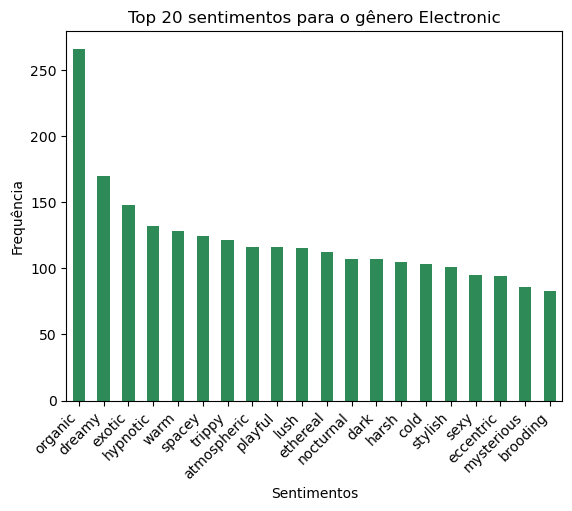

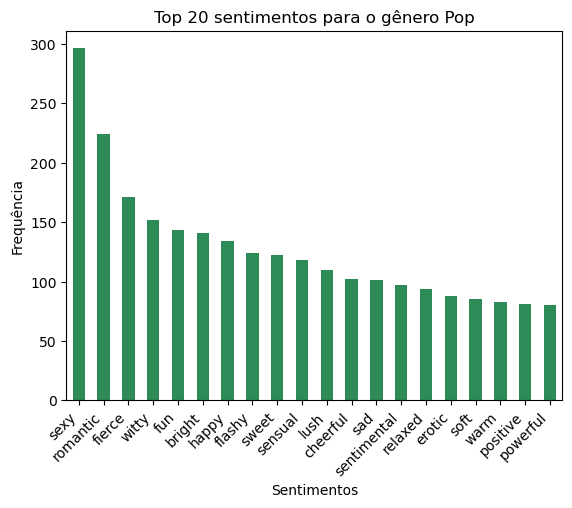

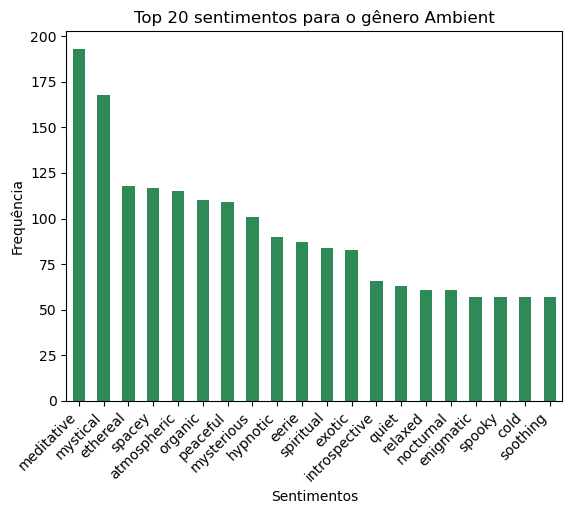

In [122]:
# vamos ver os sentimentos que mais aparecem para cada gênero

indie_top_sentimentos.plot.bar(color = "#2E8B57")
plt.xlabel("Sentimentos")
plt.ylabel("Frequência")
plt.title("Top 20 sentimentos para o gênero Indie")
plt.xticks(rotation = 45, ha = 'right')
plt.show()

rock_top_sentimentos.plot.bar(color = "#2E8B57")
plt.xlabel("Sentimentos")
plt.ylabel("Frequência")
plt.title("Top 20 sentimentos para o gênero Rock")
plt.xticks(rotation = 45, ha = 'right')
plt.show()

electronic_top_sentimentos.plot.bar(color = "#2E8B57")
plt.xlabel("Sentimentos")
plt.ylabel("Frequência")
plt.title("Top 20 sentimentos para o gênero Electronic")
plt.xticks(rotation = 45, ha = 'right')
plt.show()

pop_top_sentimentos.plot.bar(color = "#2E8B57")
plt.xlabel("Sentimentos")
plt.ylabel("Frequência")
plt.title("Top 20 sentimentos para o gênero Pop")
plt.xticks(rotation = 45, ha = 'right')
plt.show()

ambient_top_sentimentos.plot.bar(color = "#2E8B57")
plt.xlabel("Sentimentos")
plt.ylabel("Frequência")
plt.title("Top 20 sentimentos para o gênero Ambient")
plt.xticks(rotation = 45, ha = 'right')
plt.show()

## Estatísticas

Vamos ver as estatísticas para as variáveis "valence_tags", "arousal_tags" e "dominance_tags" para os gêneros Indie, Rock, Electronic, Pop e Ambient.

- valence: "the pleasantness of a stimulus" => agradabilidade de um estímulo
- arousal: "the intensity of emotion provoked by a stimulus" => a intensidade da emoção provocada por um estímulo
- dominance: "the degree of control exerted by a stimulus" => o grau de controle exercido por um estímulo

In [123]:
# construindo datasets para construir estatísticas

df_estatisticas = dados[dados.columns[3:7]].copy()
df_estatisticas_indie = df_estatisticas[df_estatisticas["genre"] == "indie"]
df_estatisticas_rock  = df_estatisticas[df_estatisticas["genre"] == "rock"]
df_estatisticas_electronic = df_estatisticas[df_estatisticas["genre"] == "electronic"]
df_estatisticas_pop = df_estatisticas[df_estatisticas["genre"] == "pop"]
df_estatisticas_ambient = df_estatisticas[df_estatisticas["genre"] == "ambient"]


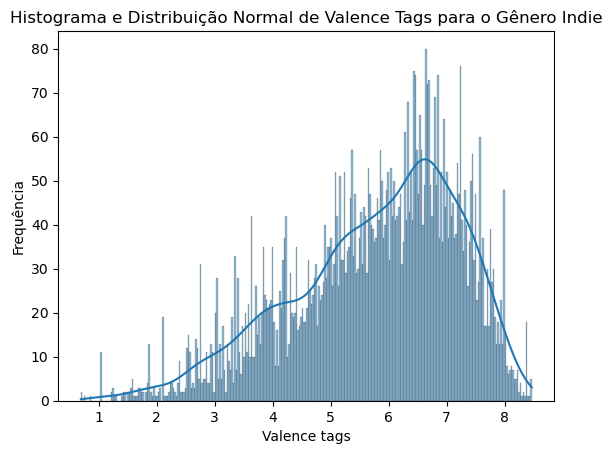

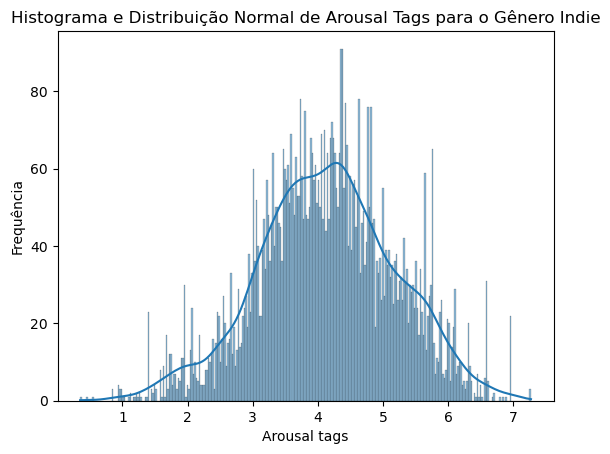

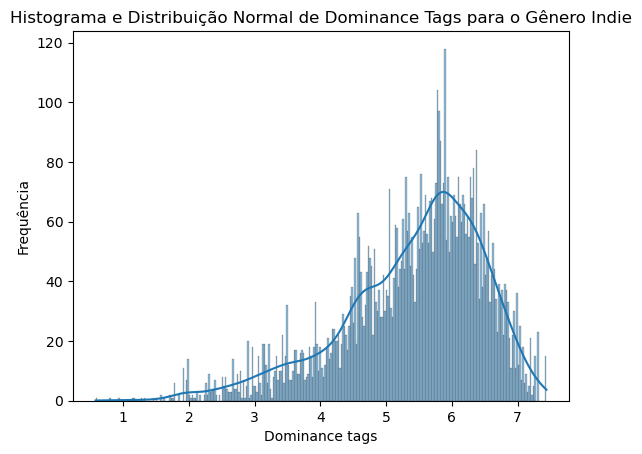

In [124]:
# estatísticas para o genero indie

sns.histplot(df_estatisticas_indie["valence_tags"], kde=True, bins = 300)
plt.xlabel("Valence tags")
plt.ylabel("Frequência")
plt.title("Histograma e Distribuição Normal de Valence Tags para o Gênero Indie")
plt.show()

sns.histplot(df_estatisticas_indie["arousal_tags"], kde=True, bins = 300)
plt.xlabel("Arousal tags")
plt.ylabel("Frequência")
plt.title("Histograma e Distribuição Normal de Arousal Tags para o Gênero Indie")
plt.show()

sns.histplot(df_estatisticas_indie["dominance_tags"], kde=True,  bins = 300)
plt.xlabel("Dominance tags")
plt.ylabel("Frequência")
plt.title("Histograma e Distribuição Normal de Dominance Tags para o Gênero Indie")
plt.show()

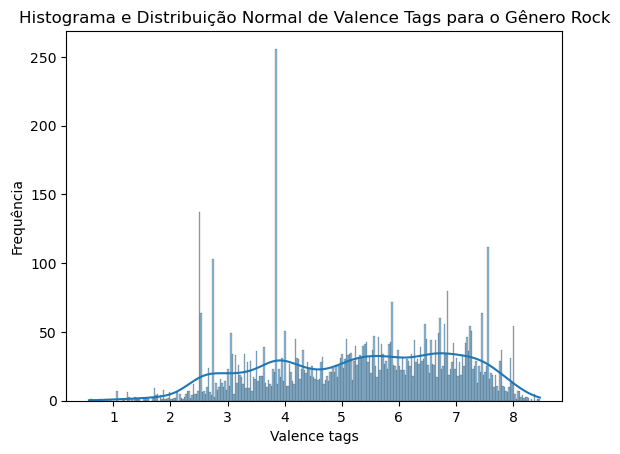

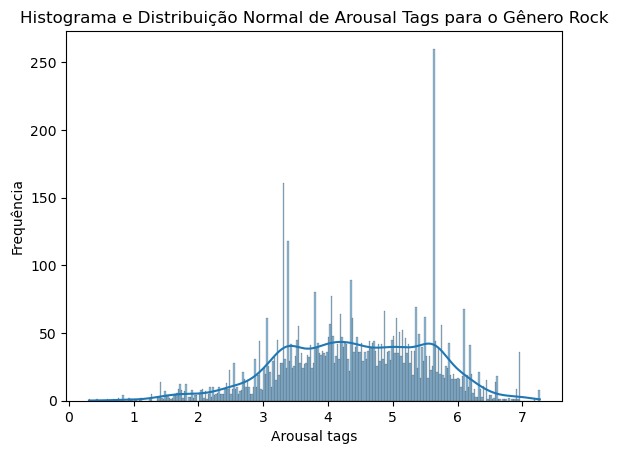

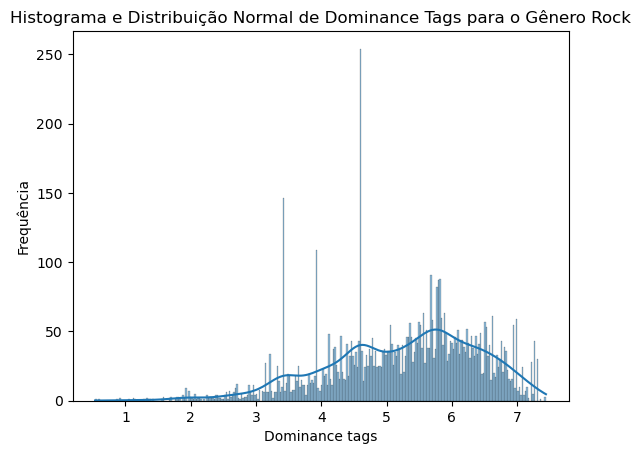

In [125]:
# estatísticas para o genero rock

sns.histplot(df_estatisticas_rock["valence_tags"], kde=True, bins = 300)
plt.xlabel("Valence tags")
plt.ylabel("Frequência")
plt.title("Histograma e Distribuição Normal de Valence Tags para o Gênero Rock")
plt.show()

sns.histplot(df_estatisticas_rock["arousal_tags"], kde=True, bins = 300)
plt.xlabel("Arousal tags")
plt.ylabel("Frequência")
plt.title("Histograma e Distribuição Normal de Arousal Tags para o Gênero Rock")
plt.show()

sns.histplot(df_estatisticas_rock["dominance_tags"], kde=True, bins = 300)
plt.xlabel("Dominance tags")
plt.ylabel("Frequência")
plt.title("Histograma e Distribuição Normal de Dominance Tags para o Gênero Rock")
plt.show()

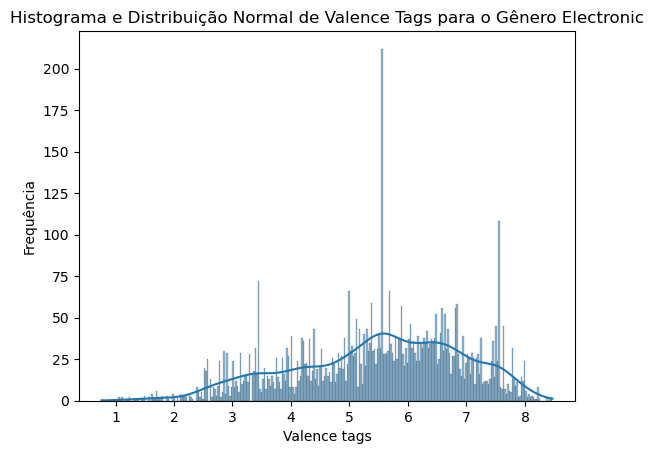

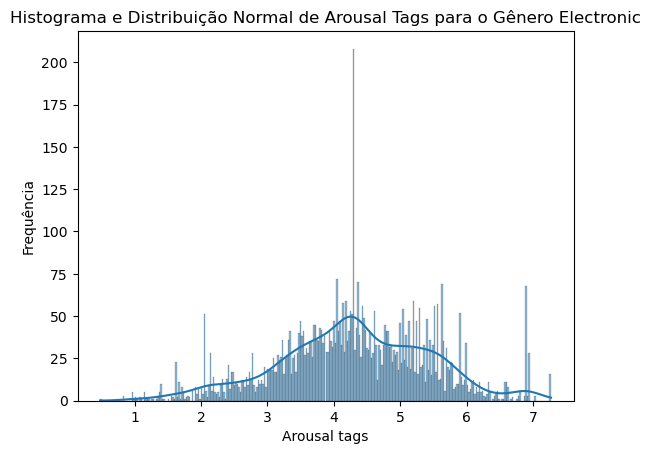

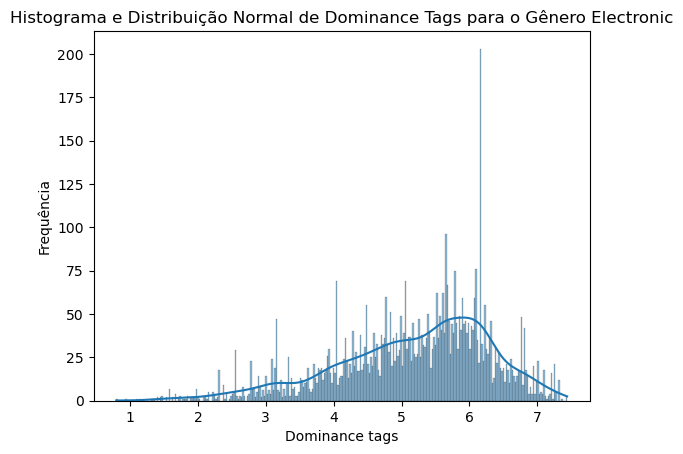

In [126]:
# estatísticas para o genero electronic

sns.histplot(df_estatisticas_electronic["valence_tags"], kde=True, bins = 300)
plt.xlabel("Valence tags")
plt.ylabel("Frequência")
plt.title("Histograma e Distribuição Normal de Valence Tags para o Gênero Electronic")
plt.show()

sns.histplot(df_estatisticas_electronic["arousal_tags"], kde=True, bins = 300)
plt.xlabel("Arousal tags")
plt.ylabel("Frequência")
plt.title("Histograma e Distribuição Normal de Arousal Tags para o Gênero Electronic")
plt.show()

sns.histplot(df_estatisticas_electronic["dominance_tags"], kde=True, bins = 300)
plt.xlabel("Dominance tags")
plt.ylabel("Frequência")
plt.title("Histograma e Distribuição Normal de Dominance Tags para o Gênero Electronic")
plt.show()

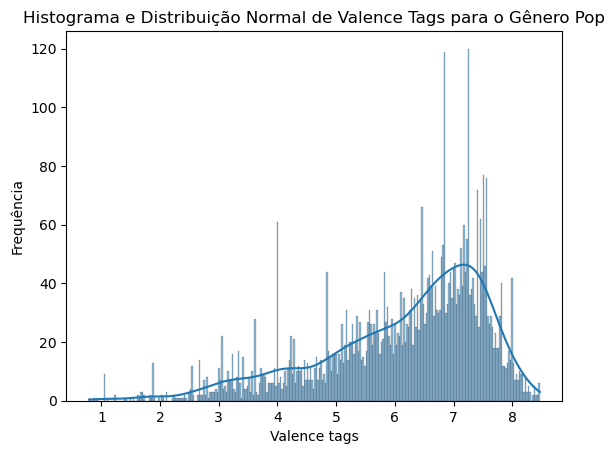

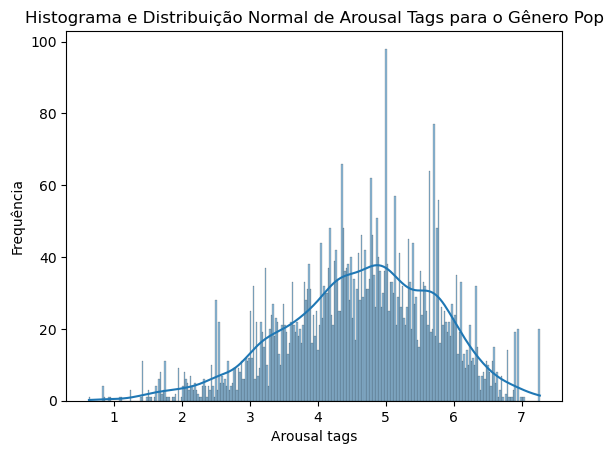

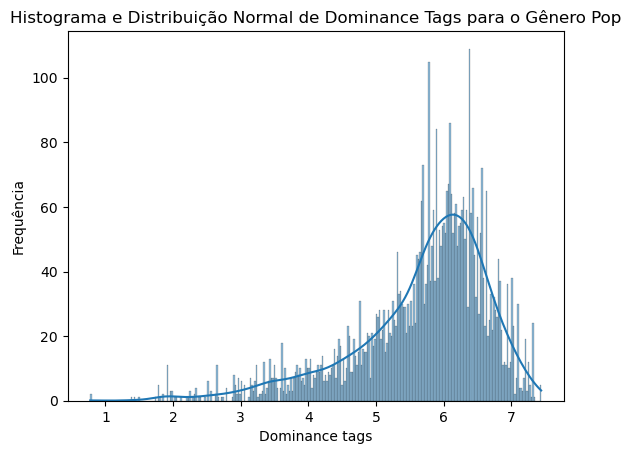

In [127]:
# estatísticas para o genero pop

sns.histplot(df_estatisticas_pop["valence_tags"], kde=True, bins = 300)
plt.xlabel("Valence tags")
plt.ylabel("Frequência")
plt.title("Histograma e Distribuição Normal de Valence Tags para o Gênero Pop")
plt.show()

sns.histplot(df_estatisticas_pop["arousal_tags"], kde=True, bins = 300)
plt.xlabel("Arousal tags")
plt.ylabel("Frequência")
plt.title("Histograma e Distribuição Normal de Arousal Tags para o Gênero Pop")
plt.show()

sns.histplot(df_estatisticas_pop["dominance_tags"], kde=True, bins = 300)
plt.xlabel("Dominance tags")
plt.ylabel("Frequência")
plt.title("Histograma e Distribuição Normal de Dominance Tags para o Gênero Pop")
plt.show()

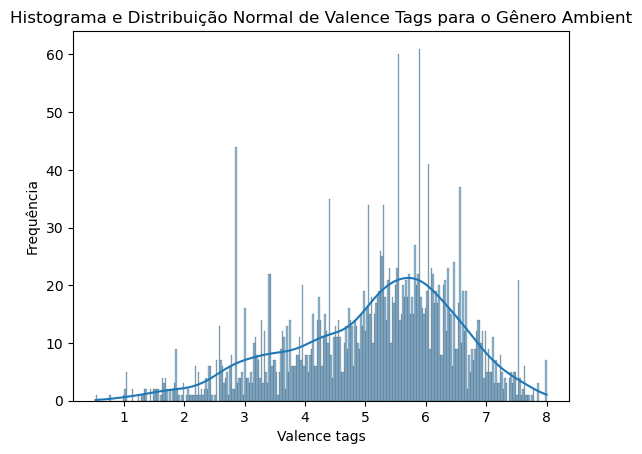

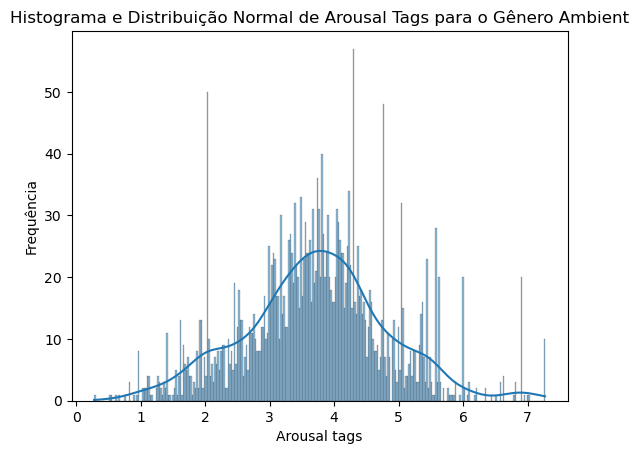

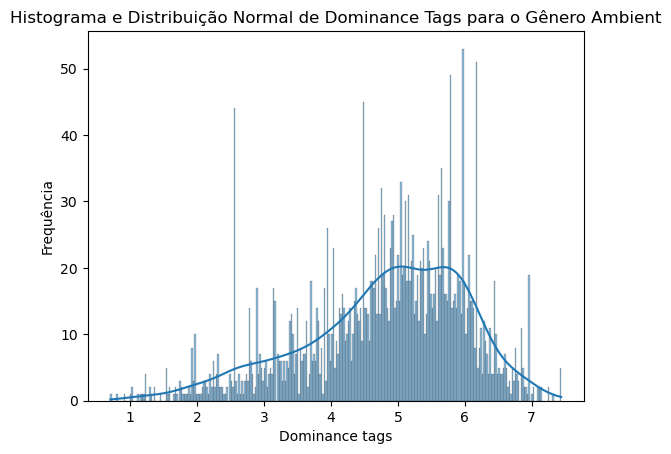

In [128]:
# estatísticas para o genero ambient

sns.histplot(df_estatisticas_ambient["valence_tags"], kde=True, bins = 300)
plt.xlabel("Valence tags")
plt.ylabel("Frequência")
plt.title("Histograma e Distribuição Normal de Valence Tags para o Gênero Ambient")
plt.show()

sns.histplot(df_estatisticas_ambient["arousal_tags"], kde=True, bins = 300)
plt.xlabel("Arousal tags")
plt.ylabel("Frequência")
plt.title("Histograma e Distribuição Normal de Arousal Tags para o Gênero Ambient")
plt.show()

sns.histplot(df_estatisticas_ambient["dominance_tags"], kde=True, bins = 300)
plt.xlabel("Dominance tags")
plt.ylabel("Frequência")
plt.title("Histograma e Distribuição Normal de Dominance Tags para o Gênero Ambient")
plt.show()

## Mais estatísticas

# Geral

In [156]:
df_valance_tags = dados.groupby(['genre']).agg({'valence_tags': 'mean'}).sort_values(['valence_tags'], ascending=False)
df_valance_tags.describe()

,valence_tags
count,812.000000
mean,5.471066
std,1.181742
min,0.688276
25%,4.806287
50%,5.508881
75%,6.309774
max,8.135000


In [157]:
df_dominance_tags = dados.groupby(['genre']).agg({'dominance_tags': 'mean'}).sort_values(['dominance_tags'], ascending=False)
df_dominance_tags.describe()

,dominance_tags
count,812.000000
mean,5.286630
std,0.871846
min,0.781379
25%,4.790005
50%,5.310000
75%,5.830771
max,7.440000


In [158]:
df_arousal_tags = dados.groupby(['genre']).agg({'arousal_tags': 'mean'}).sort_values(['arousal_tags'], ascending=False)
df_arousal_tags.describe()

,arousal_tags
count,812.000000
mean,4.482345
std,0.838523
min,0.491724
25%,3.982802
50%,4.479334
75%,4.983368
max,6.950000


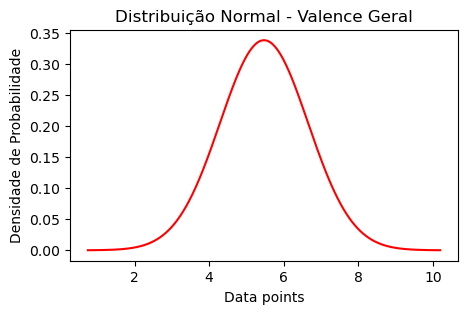

In [129]:
media_valance_tags = round(df_valance_tags.mean(), 2)
desvio_padrao_valance_tags = round(df_valance_tags.std(), 2)

plt.figure(figsize=(5,3))

x = np.linspace(media_valance_tags-4*desvio_padrao_valance_tags, media_valance_tags+4*desvio_padrao_valance_tags, 500)

y = norm(loc = media_valance_tags, scale = desvio_padrao_valance_tags).pdf(x)

plt.title("Distribuição Normal - Valence Geral")

# Label X
plt.xlabel('Data points')

# Label Y
plt.ylabel('Densidade de Probabilidade')

plt.plot(x, y, color = 'red')

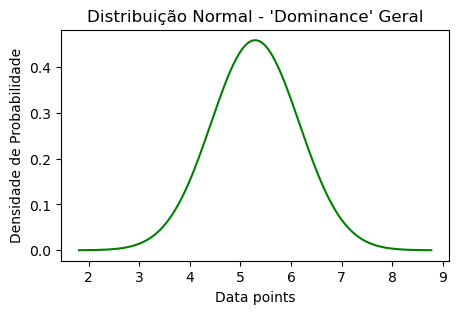

In [130]:
media_dominance_tags = round(df_dominance_tags.mean(), 2)
desvio_padrao_dominance_tags = round(df_dominance_tags.std(), 2)

plt.figure(figsize=(5,3))

x2 = np.linspace(media_dominance_tags-4*desvio_padrao_dominance_tags, media_dominance_tags+4*desvio_padrao_dominance_tags, 500)

y2 = norm(loc = media_dominance_tags, scale = desvio_padrao_dominance_tags).pdf(x2)

plt.title("Distribuição Normal - 'Dominance' Geral")

# Label X
plt.xlabel('Data points')

# Label Y
plt.ylabel('Densidade de Probabilidade')

plt.plot(x2, y2, color = 'green')

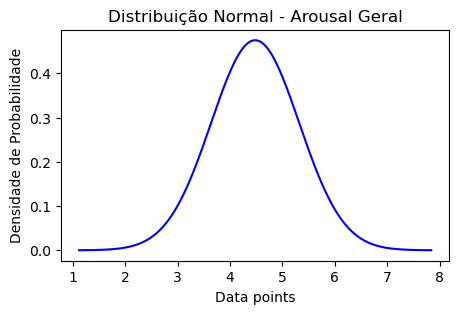

In [131]:
media_arousal_tags = round(df_arousal_tags.mean(), 2)
desvio_padrao_arousal_tags = round(df_arousal_tags.std(), 2)

plt.figure(figsize=(5,3))

x3 = np.linspace(media_arousal_tags-4*desvio_padrao_arousal_tags, media_arousal_tags+4*desvio_padrao_arousal_tags, 500)

y3 = norm(loc = media_arousal_tags, scale = desvio_padrao_arousal_tags).pdf(x3)

plt.title("Distribuição Normal - Arousal Geral")

# Label X
plt.xlabel('Data points')

# Label Y
plt.ylabel('Densidade de Probabilidade')

plt.plot(x3, y3, color = 'blue')

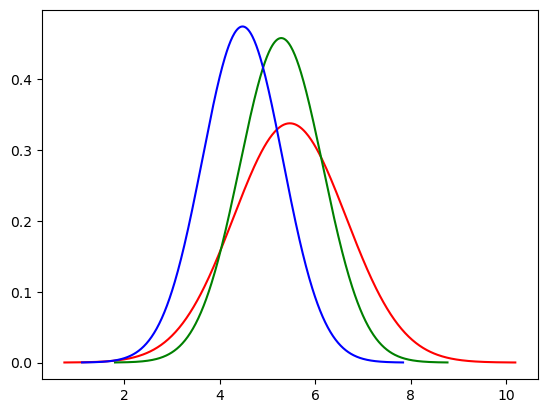

In [132]:
plt.plot(x, y, color = 'red')
plt.plot(x2, y2, color = 'green')
plt.plot(x3, y3, color = 'blue')

# Gênero Indie

In [74]:
print(df_estatisticas_indie)
(df_estatisticas_indie.describe())

       valence_tags  arousal_tags  dominance_tags  genre
40         5.533680      4.276461        5.643792  indie
42         6.007500      4.641050        5.769050  indie
135        5.250000      6.335000        5.745000  indie
199        3.746667      5.276667        5.196667  indie
204        5.135000      5.335000        5.405000  indie
...             ...           ...             ...    ...
88944      3.300000      4.780000        4.950000  indie
88951      3.300000      4.780000        4.950000  indie
88999      5.370000      3.450000        5.330000  indie
89012      6.685000      4.405000        5.625000  indie
89014      5.370000      3.450000        5.330000  indie

[6919 rows x 4 columns]


,valence_tags,arousal_tags,dominance_tags
count,6919.000000,6919.000000,6919.000000
mean,5.772618,4.135168,5.407419
std,1.446532,1.060427,1.085525
min,0.692632,0.350495,0.578421
25%,4.880000,3.450000,4.772435
50%,6.018421,4.142069,5.620000
75%,6.860000,4.820000,6.189949
max,8.470000,7.270000,7.440000


In [167]:
# DATAFRAME REFERENTE AOS VALORES DO GÊNERO INDIE

df_indie_valence = df_estatisticas_indie["valence_tags"]
df_indie_arousal = df_estatisticas_indie["arousal_tags"]
df_indie_dominance = df_estatisticas_indie["dominance_tags"]

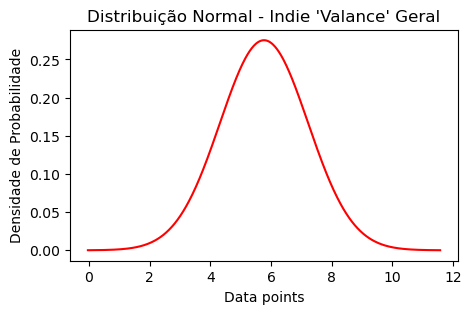

In [168]:
# GRÁFICO INDIE_VALANCE_TAGS

media_indie_valence_tags = round(df_indie_valence.mean(), 2)
desvio_padrao_indie_valence_tags = round(df_indie_valence.std(), 2)

plt.figure(figsize=(5,3))

x_indie_valence = np.linspace(media_indie_valence_tags-4*desvio_padrao_indie_valence_tags, media_indie_valence_tags+4*desvio_padrao_indie_valence_tags, 500)

y_indie_valence = norm(loc = media_indie_valence_tags, scale = desvio_padrao_indie_valence_tags).pdf(x_indie_valence)

plt.title("Distribuição Normal - Indie 'Valance' Geral")

# Label X
plt.xlabel('Data points')

# Label Y
plt.ylabel('Densidade de Probabilidade')

plt.plot(x_indie_valence, y_indie_valence, color = 'red')

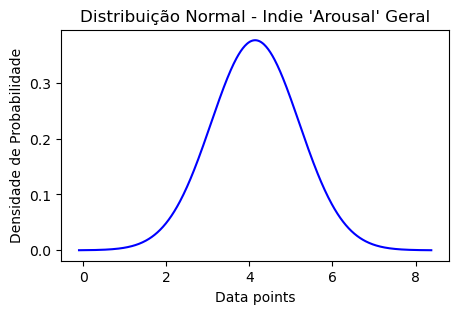

In [169]:
# GRÁFICO INDIE_AROUSAL_TAGS

media_indie_arousal_tags = round(df_indie_arousal.mean(), 2)
desvio_padrao_indie_arousal_tags = round(df_indie_arousal.std(), 2)

plt.figure(figsize=(5,3))

x_indie_arousal = np.linspace(media_indie_arousal_tags-4*desvio_padrao_indie_arousal_tags, media_indie_arousal_tags+4*desvio_padrao_indie_arousal_tags, 500)

y_indie_arousal = norm(loc = media_indie_arousal_tags, scale = desvio_padrao_indie_arousal_tags).pdf(x_indie_arousal)

plt.title("Distribuição Normal - Indie 'Arousal' Geral")

# Label X
plt.xlabel('Data points')

# Label Y
plt.ylabel('Densidade de Probabilidade')

plt.plot(x_indie_arousal, y_indie_arousal, color = 'blue')

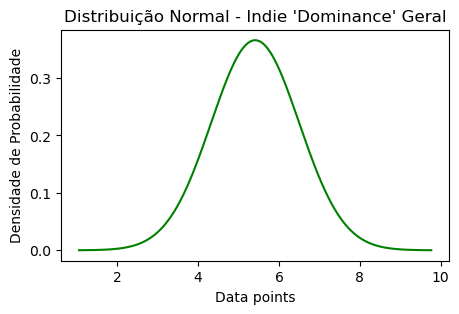

In [170]:
# GRÁFICO INDIE_DOMINANCE_TAGS

media_indie_dominance_tags = round(df_indie_dominance.mean(), 2)
desvio_padrao_indie_dominance_tags = round(df_indie_dominance.std(), 2)

plt.figure(figsize=(5,3))

x_indie_dominance = np.linspace(media_indie_dominance_tags-4*desvio_padrao_indie_dominance_tags, media_indie_dominance_tags+4*desvio_padrao_indie_dominance_tags, 500)

y_indie_dominance = norm(loc = media_indie_dominance_tags, scale = desvio_padrao_indie_dominance_tags).pdf(x_indie_dominance)

plt.title("Distribuição Normal - Indie 'Dominance' Geral")

# Label X
plt.xlabel('Data points')

# Label Y
plt.ylabel('Densidade de Probabilidade')

plt.plot(x_indie_dominance, y_indie_dominance, color = 'green')

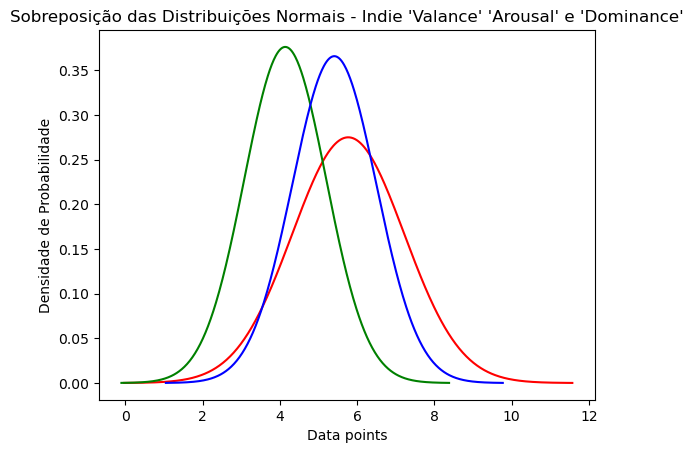

In [171]:
# SOBREPOSIÇÃO DE DISTRIBUIÇÃO NORMAL PARA AS 3 VARIÁVEIS

plt.title("Sobreposição das Distribuições Normais - Indie 'Valance' 'Arousal' e 'Dominance'")

# Label X
plt.xlabel('Data points')

# Label Y
plt.ylabel('Densidade de Probabilidade')

plt.plot(x_indie_valence, y_indie_valence, color = 'red')
plt.plot(x_indie_arousal, y_indie_arousal, color = 'green')
plt.plot(x_indie_dominance, y_indie_dominance, color = 'blue')

# Gênero Pop

In [172]:
# DATAFRAMES REFERENTES AO GÊNERO POP

df_pop_arousal = df_estatisticas_pop["arousal_tags"]
df_pop_valence = df_estatisticas_pop["valence_tags"]
df_pop_dominance = df_estatisticas_pop["dominance_tags"]

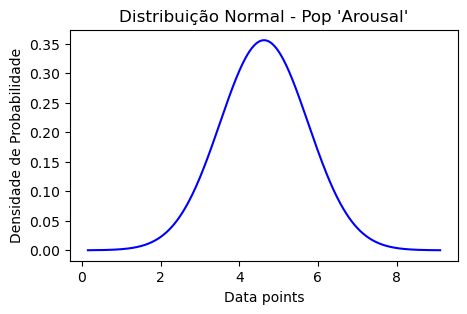

In [173]:
# GRÁFICO POP_AROUSAL_TAGS

media_pop_arousal_tags = round(df_pop_arousal.mean(), 2)
desvio_padrao_pop_arousal_tags = round(df_pop_arousal.std(), 2)

plt.figure(figsize=(5,3))

x_pop_arousal = np.linspace(media_pop_arousal_tags-4*desvio_padrao_pop_arousal_tags, media_pop_arousal_tags+4*desvio_padrao_pop_arousal_tags, 500)

y_pop_arousal = norm(loc = media_pop_arousal_tags, scale = desvio_padrao_pop_arousal_tags).pdf(x_pop_arousal)

plt.title("Distribuição Normal - Pop 'Arousal'")

# Label X
plt.xlabel('Data points')

# Label Y
plt.ylabel('Densidade de Probabilidade')

plt.plot(x_pop_arousal, y_pop_arousal, color = 'blue')

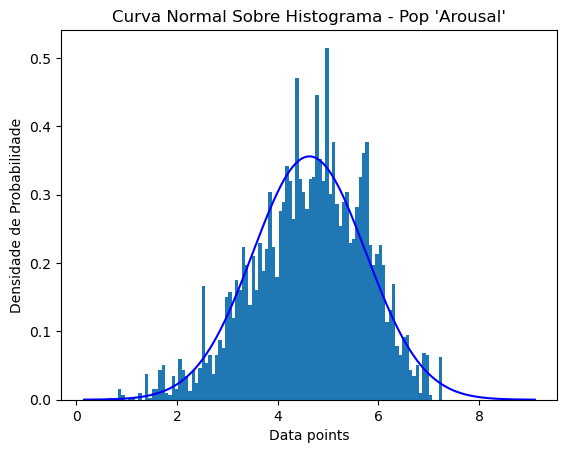

In [174]:
# GRÁFICO CURVA NORMAL SOBRE HISTOGRAMA - Arousal

plt.title("Curva Normal Sobre Histograma - Pop 'Arousal'")

# Label X
plt.xlabel('Data points')

# Label Y
plt.ylabel('Densidade de Probabilidade')

media_pop_arousal_tags, desvio_padrao_pop_arousal_tags = norm.fit(df_pop_arousal)
plt.hist(df_pop_arousal, bins=100, density=True)
plt.plot(x_pop_arousal, y_pop_arousal, color='blue')

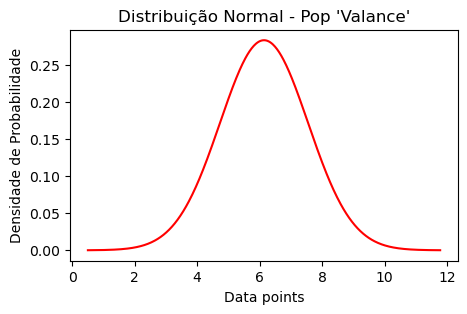

In [175]:
media_pop_valence_tags = round(df_pop_valence.mean(), 2)
desvio_padrao_pop_valence_tags = round(df_pop_valence.std(), 2)

plt.figure(figsize=(5,3))

x_pop_valence = np.linspace(media_pop_valence_tags-4*desvio_padrao_pop_valence_tags, media_pop_valence_tags+4*desvio_padrao_pop_valence_tags, 500)

y_pop_valence = norm(loc = media_pop_valence_tags, scale = desvio_padrao_pop_valence_tags).pdf(x_pop_valence)

plt.title("Distribuição Normal - Pop 'Valance'")

# Label X
plt.xlabel('Data points')

# Label Y
plt.ylabel('Densidade de Probabilidade')

plt.plot(x_pop_valence, y_pop_valence, color = 'red')

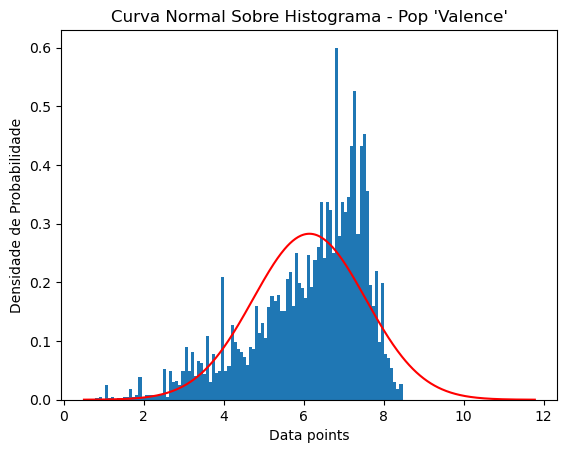

In [176]:
# GRÁFICO CURVA NORMAL SOBRE HISTOGRAMA - Valence

plt.title("Curva Normal Sobre Histograma - Pop 'Valence'")

# Label X
plt.xlabel('Data points')

# Label Y
plt.ylabel('Densidade de Probabilidade')

media_pop_arousal_tags, desvio_padrao_pop_arousal_tags = norm.fit(df_pop_valence)
plt.hist(df_pop_valence, bins=100, density=True)
plt.plot(x_pop_valence, y_pop_valence, color='red')

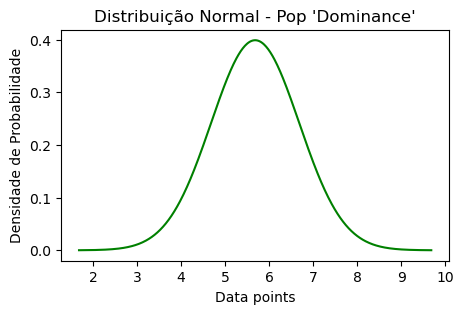

In [177]:
media_pop_dominance_tags = round(df_pop_dominance.mean(), 2)
desvio_padrao_pop_dominance_tags = round(df_pop_dominance.std(), 2)

plt.figure(figsize=(5,3))

x_pop_dominance = np.linspace(media_pop_dominance_tags-4*desvio_padrao_pop_dominance_tags, media_pop_dominance_tags+4*desvio_padrao_pop_dominance_tags, 500)

y_pop_dominance = norm(loc = media_pop_dominance_tags, scale = desvio_padrao_pop_dominance_tags).pdf(x_pop_dominance)

plt.title("Distribuição Normal - Pop 'Dominance'")

# Label X
plt.xlabel('Data points')

# Label Y
plt.ylabel('Densidade de Probabilidade')

plt.plot(x_pop_dominance, y_pop_dominance, color = 'green')

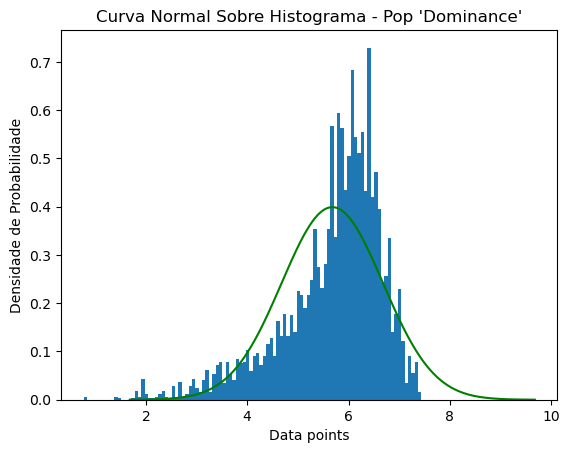

In [178]:
# GRÁFICO CURVA NORMAL SOBRE HISTOGRAMA - Dominance

plt.title("Curva Normal Sobre Histograma - Pop 'Dominance'")

# Label X
plt.xlabel('Data points')

# Label Y
plt.ylabel('Densidade de Probabilidade')

media_pop_dominance_tags, desvio_padrao_pop_dominance_tags = norm.fit(df_pop_dominance)
plt.hist(df_pop_dominance, bins=100, density=True)
plt.plot(x_pop_dominance, y_pop_dominance, color='green')

### Análise: Gênero x (Valence, Arousal e Dominance)

- valence: "the pleasantness of a stimulus" => agradabilidade de um estímulo
- arousal: "the intensity of emotion provoked by a stimulus" => a intensidade da emoção provocada por um estímulo
- dominance: "the degree of control exerted by a stimulus" => o grau de controle exercido por um estímulo

In [133]:
dados.describe()

,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,child-like,silly,introspective,dreamy,rebellious,wintry,...,suspenseful,exotic,athletic,gritty,mighty,strong,ironic,elegant,enigmatic,flowing
count,89027.000000,89027.000000,89027.000000,89027.000000,89027.000000,89027.000000,89027.000000,89027.000000,89027.000000,89027.000000,...,89027.000000,89027.000000,89027.000000,89027.000000,89027.000000,89027.000000,89027.000000,89027.000000,89027.000000,89027.000000
mean,3.970346,5.452216,4.318287,5.244841,0.000607,0.011087,0.008615,0.011109,0.001988,0.000809,...,0.000550,0.011188,0.000236,0.011176,0.000741,0.007369,0.010738,0.010626,0.004347,0.004089
std,4.136574,1.554032,1.155885,1.172035,0.024621,0.104708,0.092419,0.104813,0.044545,0.028427,...,0.023454,0.105179,0.015357,0.105127,0.027218,0.085524,0.103069,0.102534,0.065789,0.063812
min,1.000000,0.235000,0.108113,0.229231,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.270192,3.527305,4.548108,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,5.650000,4.332723,5.460000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,6.696292,5.153333,6.115241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,50.000000,8.475000,7.270000,7.440000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [134]:
dados['genre'].value_counts()

indie                      6919
unknown                    6608
rock                       6095
electronic                 5376
pop                        4794
                           ... 
experimental electronic       1
c86                           1
holidays                      1
alternative hip hop           1
tex-mex                       1
Name: genre, Length: 812, dtype: int64

In [135]:
dados.groupby(['genre']).agg({'valence_tags': 'mean'}).sort_values(['valence_tags'], ascending=False)

,valence_tags
genre,
tekno,8.135000
forro,8.000000
noisecore,8.000000
crack rock steady,7.950000
hyperpop,7.846667
...,...
emo rap,2.100000
fidget house,1.970000
red dirt,1.870000


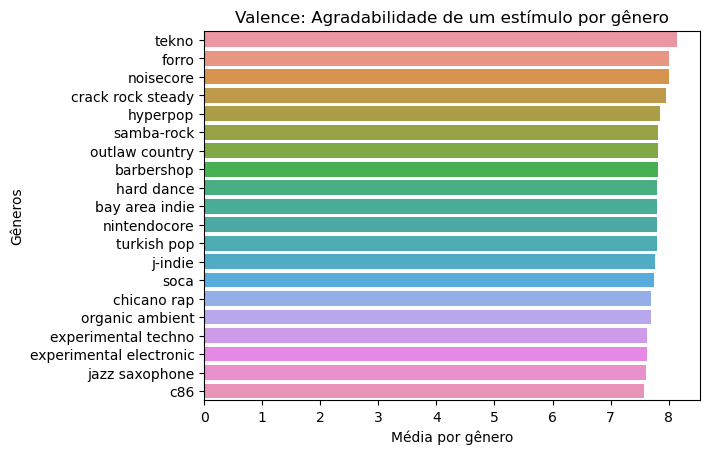

In [136]:
df = dados.groupby('genre')['valence_tags'].mean().reset_index().sort_values('valence_tags', ascending=False)[:20]
sns.barplot(df, y='genre', x='valence_tags')
plt.title('Valence: Agradabilidade de um estímulo por gênero')
plt.xlabel('Média por gênero')
plt.ylabel('Gêneros')
plt.show()

In [137]:
dados.groupby(['genre']).agg({'arousal_tags': 'mean'}).sort_values(['arousal_tags'], ascending=False)

,arousal_tags
genre,
crack rock steady,6.950000
new orleans rap,6.950000
erotica,6.930833
cumbia,6.900000
ngoni,6.900000
...,...
red dirt,2.065000
chamber folk,2.000000
electro swing,1.670000


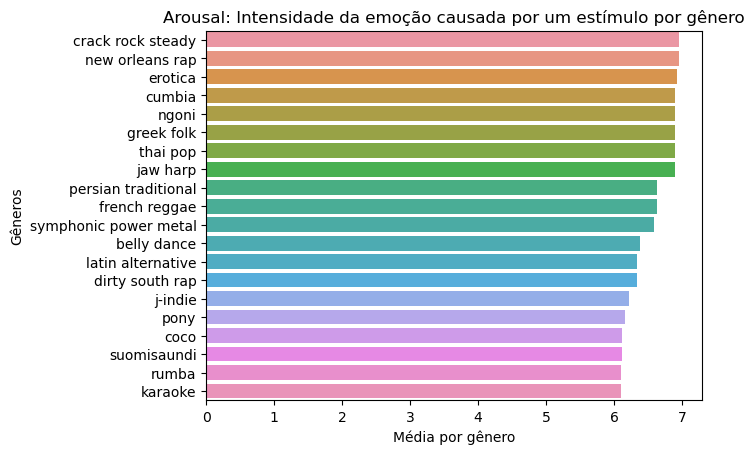

In [138]:
df = dados.groupby('genre')['arousal_tags'].mean().reset_index().sort_values('arousal_tags', ascending=False)[:20]
sns.barplot(df, y='genre', x='arousal_tags')
plt.title('Arousal: Intensidade da emoção causada por um estímulo por gênero')
plt.xlabel('Média por gênero')
plt.ylabel('Gêneros')
plt.show()

In [139]:
dados.groupby(['genre']).agg({'dominance_tags': 'mean'}).sort_values(['dominance_tags'], ascending=False)

,dominance_tags
genre,
electro swing,7.440000
forro,7.320000
c86,7.260000
organic ambient,7.252500
j-indie,7.235000
...,...
fidget house,2.415000
halloween,2.185339
chamber folk,2.090000


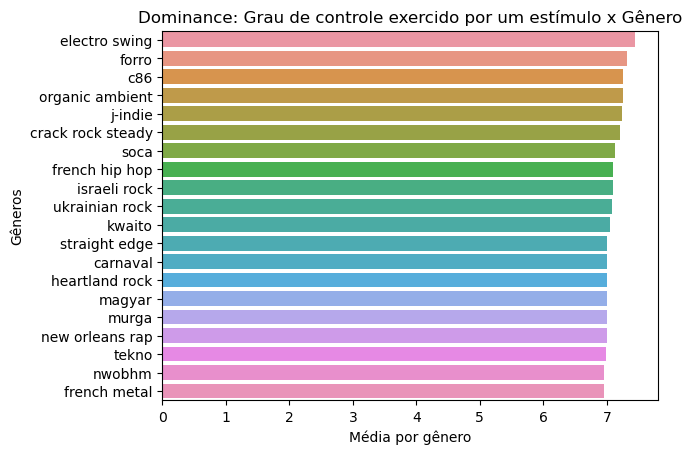

In [140]:
df = dados.groupby('genre')['dominance_tags'].mean().reset_index().sort_values('dominance_tags', ascending=False)[:20]
sns.barplot(df, y='genre', x='dominance_tags')
plt.title('Dominance: Grau de controle exercido por um estímulo x Gênero')
plt.xlabel('Média por gênero')
plt.ylabel('Gêneros')
plt.show()

In [141]:
dados['artist'].value_counts()

志方あきこ                          302
Skerror                        284
Robbie Williams                199
Bob Dylan                      177
Warren Zevon                   139
                              ... 
Ariel Winter                     1
???                              1
Rockman.exe                      1
Grey Delisle & Frank Welker      1
Ace White                        1
Name: artist, Length: 25984, dtype: int64

In [142]:
dados.groupby(['artist']).agg({'valence_tags': 'mean'}).sort_values(['valence_tags'], ascending=False)

,valence_tags
artist,
BØRNS,8.470000
Anne-Marie,8.470000
Broncho,8.420000
Bleachers,8.420000
Cherub,8.420000
...,...
The Lonnie Donegan Skiffle Group,0.688276
Morten Sørlie,0.600000
The Frantics,0.415088


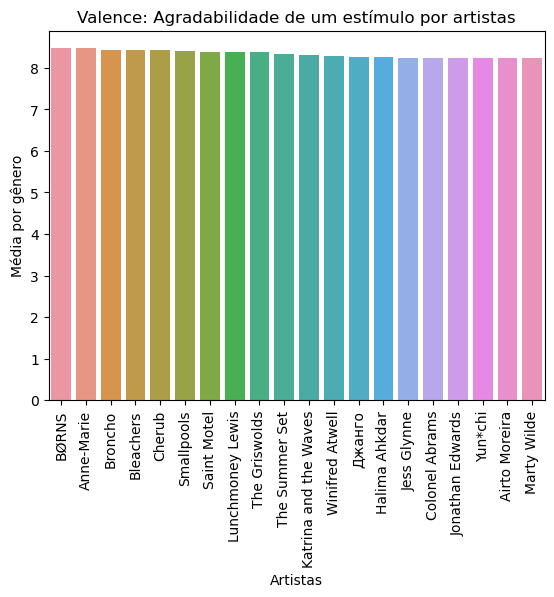

In [143]:
df = dados.groupby('artist')['valence_tags'].mean().reset_index().sort_values('valence_tags', ascending=False)[:20]
sns.barplot(df, x='artist', y='valence_tags')
plt.title('Valence: Agradabilidade de um estímulo por artistas')
plt.ylabel('Média por gênero')
plt.xlabel('Artistas')
plt.xticks(rotation=90)
plt.show()

In [144]:
dados.groupby(['artist']).agg({'arousal_tags': 'mean'}).sort_values(['arousal_tags'], ascending=False)

,arousal_tags
artist,
VIDOLL,7.270000
Tanga,7.270000
Dezire,7.270000
Strawpeople,7.270000
Sabrina Malheiros,7.270000
...,...
Kool Keith - Dr. Octagon,0.623333
Jayhawks,0.579841
The Lonnie Donegan Skiffle Group,0.491724


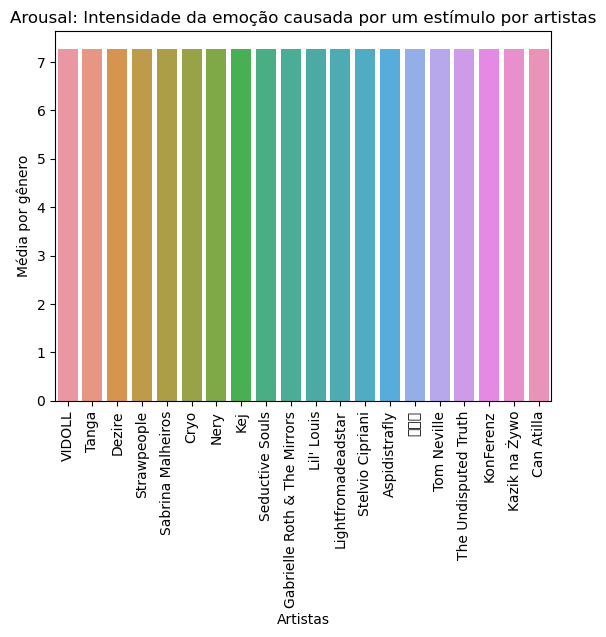

In [145]:
df = dados.groupby('artist')['arousal_tags'].mean().reset_index().sort_values('arousal_tags', ascending=False)[:20]
sns.barplot(df, x='artist', y='arousal_tags')
plt.title('Arousal: Intensidade da emoção causada por um estímulo por artistas')
plt.ylabel('Média por gênero')
plt.xlabel('Artistas')
plt.xticks(rotation=90)
plt.show()

In [146]:
dados.groupby(['artist']).agg({'dominance_tags': 'mean'}).sort_values(['dominance_tags'], ascending=False)

,dominance_tags
artist,
Graveyard,7.440000
Jota Quest,7.440000
The Honey Trees,7.440000
Force of Nature,7.440000
"Sonu Nigam, Mahalaxmi Lyer & Alisha Chinoi",7.350000
...,...
Cherish The Ladies,0.750000
Morten Sørlie,0.740000
China Anne McClain,0.482609


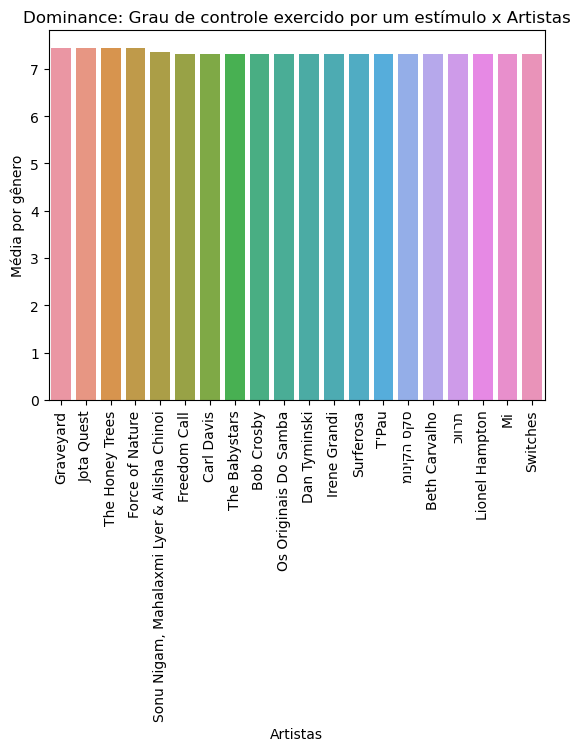

In [147]:
df = dados.groupby('artist')['dominance_tags'].mean().reset_index().sort_values('dominance_tags', ascending=False)[:20]
sns.barplot(df, x='artist', y='dominance_tags')
plt.title('Dominance: Grau de controle exercido por um estímulo x Artistas')
plt.ylabel('Média por gênero')
plt.xlabel('Artistas')
plt.xticks(rotation=90)
plt.show()

In [148]:
dados['track'].value_counts()

Intro                         48
Untitled                      45
Home                          29
Lullaby                       29
Ave Maria                     28
                              ..
57821                          1
Flash Back                     1
Stop It                        1
Out in the Streets             1
Transparent (Full Version)     1
Name: track, Length: 78614, dtype: int64

In [149]:
# Valores máximos para cada tag
dados['valence_tags'].max(),dados['arousal_tags'].max(),dados['dominance_tags'].max()

(8.475, 7.27, 7.44)

In [150]:
dados[['track', 'artist', 'valence_tags']].loc[dados['valence_tags']==dados['valence_tags'].max()]

,track,artist,valence_tags
40131,I'm Good,The Mowgli's,8.475


In [151]:
dados[['track', 'artist', 'dominance_tags']].loc[dados['dominance_tags']==dados['dominance_tags'].max()]

,track,artist,dominance_tags
86066,Sober,Childish Gambino,7.44
86087,"Ah, Weir",Yeasayer,7.44
86093,Younger Than Yesterday,Real Estate,7.44
86095,Leave It,Bombay Bicycle Club,7.44
86099,Merge,Grizzly Bear,7.44
...,...,...,...
86578,2 O'Clock,Kaki King,7.44
86581,B4 3D,Architecture in Helsinki,7.44
86582,Let's Roll (Feat. Blaktroniks),Parov Stelar,7.44
86583,Amanda's Dream,Teitur,7.44


In [152]:
dados[['track', 'artist', 'arousal_tags']].loc[dados['arousal_tags']==dados['arousal_tags'].max()]

,track,artist,arousal_tags
47870,Man Overboard,Puscifer,7.27
47874,I See Who You Are (Mark Bell Mix),Björk,7.27
47875,Bitches,Tove Lo,7.27
47904,Lucifer in Love,Edguy,7.27
47911,Everything (feat. Karin Park),Maya Jane Coles,7.27
...,...,...,...
48663,Clear With Fantasy,Govinda,7.27
48664,Two Of Hearts (European Dance Mix),Stacey Q,7.27
48666,Not Good Enough,Trolle Siebenhaar,7.27
48667,Seedy Films (Richard X Remix),Soft Cell,7.27


In [153]:
dados[['track', 'artist', 'valence_tags']].loc[dados['valence_tags']==dados['valence_tags'].min()]

,track,artist,valence_tags
72540,check it out,Beastie Boys,0.235


In [154]:
dados[['track', 'artist', 'dominance_tags']].loc[dados['dominance_tags']==dados['dominance_tags'].min()]

,track,artist,dominance_tags
72540,check it out,Beastie Boys,0.229231


In [155]:
dados[['track', 'artist', 'arousal_tags']].loc[dados['arousal_tags']==dados['arousal_tags'].min()]

,track,artist,arousal_tags
72270,Just A Little,Beau Brummels,0.108113
